**Name** : Bodhisatya Ghosh \
**Class** : CSE DS \
**UID** : 2021700026 \
**Subject** : ML \
**Experiment number** : 6

In [176]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from commonFunctions import *

In [177]:
df = pd.read_csv('./drug200.csv')
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


### EDA

#### Encode dependent and target variables

In [179]:
df['Sex'].unique(), df['BP'].unique(), df['Cholesterol'].unique()

(array(['F', 'M'], dtype=object),
 array(['HIGH', 'LOW', 'NORMAL'], dtype=object),
 array(['HIGH', 'NORMAL'], dtype=object))

In [180]:
df['Sex'].replace({'M':0,'F':1}, inplace=True)
df['BP'].replace({'LOW':0,'NORMAL':1,'HIGH':2},inplace=True)
df['Cholesterol'].replace({'NORMAL':0,'HIGH':1},inplace=True)

In [181]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['Drug'] = le.fit_transform(df['Drug'])

#### Check correlation between params

In [182]:
df.corr()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
Age,1.000000,-0.102027,-0.120918,0.068234,-0.063119,-0.004828
Sex,-0.102027,1.000000,0.044952,-0.008811,0.125008,0.098573
BP,-0.120918,0.044952,1.000000,-0.032208,0.036871,-0.328665
Cholesterol,0.068234,-0.008811,-0.032208,1.000000,-0.010000,-0.055629
Na_to_K,-0.063119,0.125008,0.036871,-0.010000,1.000000,0.589120
Drug,-0.004828,0.098573,-0.328665,-0.055629,0.589120,1.000000


<Axes: >

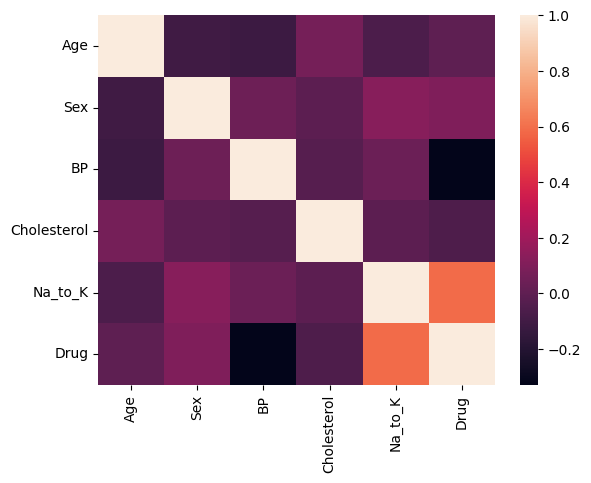

In [183]:
sns.heatmap(df.corr())

##### Function to drop small corr columns

#### Dropping columns with -0.1 <= correlation <= 0.1

In [184]:
df = get_correlated_data(df,'Drug',0.1)
df.head()

,BP,Na_to_K,Drug
0,2,25.355,4
1,0,13.093,2
2,0,10.114,2
3,1,7.798,3
4,0,18.043,4


### Preparing data for being fitted into model

#### Scaling Na_to_K column using Standard scaler

In [185]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
df['Na_to_K'] = scale.fit_transform(df[['Na_to_K']])

#### Preparing x,y and splitting into train test

In [186]:
x = df.drop(columns=['Drug'])
y = df['Drug']

In [187]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x,y, random_state=500, test_size=0.30)

### Model training

In [188]:
def fit_n_predict(model, xtrain, ytrain, xtest, ytest):
    model.fit(xtrain,ytrain)
    ypred = model.predict(xtest)
    classification_report(ytest, ypred)

#### Logistic Reg. classifier

In [189]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
fit_n_predict(lr, xtrain,  ytrain, xtest, ytest)

Confusion matrix :
[[ 4  5  0  0  0]
 [ 1  2  0  0  0]
 [ 0  0  0  6  0]
 [ 0  0  0 15  1]
 [ 0  0  0  0 26]]
Accuracy score : 78.33333333333333
F1 score : 78.33333333333333
Recall score : 78.33333333333333
Sensitivity score : 78.33333333333333


#### KNN classifier

In [190]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
fit_n_predict(knn, xtrain,  ytrain, xtest, ytest)

Confusion matrix :
[[ 3  6  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0  3  3  0]
 [ 0  0  2 14  0]
 [ 0  0  0  0 26]]
Accuracy score : 81.66666666666667
F1 score : 81.66666666666667
Recall score : 81.66666666666667
Sensitivity score : 81.66666666666667


#### Decision Tree classifier

In [191]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
fit_n_predict(dt, xtrain,  ytrain, xtest, ytest)

Confusion matrix :
[[ 8  1  0  0  0]
 [ 1  2  0  0  0]
 [ 0  0  3  3  0]
 [ 0  0  2 14  0]
 [ 0  0  0  0 26]]
Accuracy score : 88.33333333333333
F1 score : 88.33333333333333
Recall score : 88.33333333333333
Sensitivity score : 88.33333333333333


#### Random Forest Classifier

In [192]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
fit_n_predict(rfc, xtrain,  ytrain, xtest, ytest)

Confusion matrix :
[[ 8  1  0  0  0]
 [ 1  2  0  0  0]
 [ 0  0  3  3  0]
 [ 0  0  1 15  0]
 [ 0  0  0  0 26]]
Accuracy score : 90.0
F1 score : 90.0
Recall score : 90.0
Sensitivity score : 90.0
